Run this notebook to see the outputs of your model.

In [1]:
import json
import pandas as pd
from utils import preprocessing, set_index
from matplotlib import pyplot as plt
import numpy as np

In [2]:
settings_path = 'settings\settings_swat_2015_7.txt'
settings = json.load(open(settings_path, 'r'))

input_path_2015_normal = '..\..\Datasets\Scripts\SWaT_Dataset_Normal_v0_preprocessed.csv'
mu_x_path_2015_normal = settings['model_name'] + '_reconstructions_2015_normal.csv'
sigma_x_path_2015_normal = settings['model_name'] + '_sigma_2015_normal.csv'

input_path_2015_attack = '..\..\Datasets\Scripts\SWaT_Dataset_Attack_v0_preprocessed.csv'
mu_x_path_2015_attack = settings['model_name'] + '_reconstructions_2015_attack.csv'
sigma_x_path_2015_attack = settings['model_name'] + '_sigma_2015_attack.csv'

input_path_2017_normal = '..\..\Datasets\Scripts\All_preprocessed.csv'
mu_x_path_2017_normal = settings['model_name'] + '_reconstructions_2017_normal.csv'
sigma_x_path_2017_normal = settings['model_name'] + '_sigma_2017_normal.csv'

In [3]:
# Load data and predictions
data_2015_normal = pd.read_csv(input_path_2015_normal)
mu_x_2015_normal = pd.read_csv(mu_x_path_2015_normal)
sigma_x_2015_normal = pd.read_csv(sigma_x_path_2015_normal)

data_2015_attack = pd.read_csv(input_path_2015_attack)
mu_x_2015_attack = pd.read_csv(mu_x_path_2015_attack)
sigma_x_2015_attack = pd.read_csv(sigma_x_path_2015_attack)

data_2017_normal = pd.read_csv(input_path_2017_normal)
mu_x_2017_normal = pd.read_csv(mu_x_path_2017_normal)
sigma_x_2017_normal = pd.read_csv(sigma_x_path_2017_normal)

In [4]:
print(data_2015_normal.shape)
data_2015_normal.head()

(124200, 52)


Timestamp    FIT101      LIT101  MV101  P101  P102      AIT201  \
0  2015-12-22 16:00:00  2.448836  260.991600    2.0   2.0   1.0  244.328400   
1  2015-12-22 16:00:04  2.459165  260.186900    2.0   2.0   1.0  244.544650   
2  2015-12-22 16:00:08  2.609535  261.423350    2.0   2.0   1.0  244.752925   
3  2015-12-22 16:00:12  2.635637  261.413575    2.0   2.0   1.0  244.953200   
4  2015-12-22 16:00:16  2.593361  261.109350    2.0   2.0   1.0  245.033300   

    AIT202     AIT203    FIT201  ...  FIT504  P501  P502    PIT501  PIT502  \
0  8.19008  306.10100  2.468427  ...     0.0   1.0   1.0  10.02948     0.0   
1  8.19008  306.10100  2.466184  ...     0.0   1.0   1.0  10.02948     0.0   
2  8.19008  306.10100  2.470894  ...     0.0   1.0   1.0  10.02948     0.0   
3  8.19008  305.98565  2.474097  ...     0.0   1.0   1.0  10.02948     0.0   
4  8.19008  305.87030  2.473937  ...     0.0   1.0   1.0  10.02948     0.0   

     PIT503    FIT601  P601  P602  P603  
0  4.277749  0.000256   1.0   1.0   1.0  
1  4.277749  0.000256   1.0   1.0   1.0  
2  4.277749  0.000256   1.0   1.0   1.0  
3  4.277749  0.000256   1.0   1.0   1.0  
4  4.277749  0.000256   1.0   1.0   1.0  

[5 rows x 52 columns]

In [5]:
print(data_2015_attack.shape)
data_2015_attack.head()

(112500, 52)


Timestamp    FIT101      LIT101  MV101  P101  P102    AIT201  \
0  2015-12-28 10:00:00  2.474218  522.885975    2.0   2.0   1.0  262.0161   
1  2015-12-28 10:00:04  2.616981  523.916375    2.0   2.0   1.0  262.0161   
2  2015-12-28 10:00:08  2.639481  524.102850    2.0   2.0   1.0  262.0161   
3  2015-12-28 10:00:12  2.592960  522.964500    2.0   2.0   1.0  262.0161   
4  2015-12-28 10:00:16  2.528905  522.679900    2.0   2.0   1.0  262.0161   

     AIT202    AIT203    FIT201  ...    FIT504  P501  P502      PIT501  \
0  8.395475  328.6337  2.443853  ...  0.308202   2.0   1.0  250.873200   
1  8.394514  328.6337  2.443277  ...  0.308619   2.0   1.0  250.704950   
2  8.393873  328.6337  2.441803  ...  0.308154   2.0   1.0  251.029375   
3  8.390669  328.6337  2.441803  ...  0.306633   2.0   1.0  251.185600   
4  8.390669  328.4991  2.440362  ...  0.307802   2.0   1.0  251.185600   

     PIT502     PIT503    FIT601  P601  P602  P603  
0  1.649953  189.64285  0.000128   1.0   1.0   1.0  
1  1.649953  189.50270  0.000128   1.0   1.0   1.0  
2  1.649953  189.72300  0.000128   1.0   1.0   1.0  
3  1.649953  189.99940  0.000128   1.0   1.0   1.0  
4  1.649953  189.88720  0.000128   1.0   1.0   1.0  

[5 rows x 52 columns]

In [6]:
print(data_2017_normal.shape)
data_2017_normal.head()

(122649, 52)


Time  FIT101      LIT101  MV101  P101  P102   AIT201  \
0  2017-06-13 16:23:00     0.0  578.620000    1.0   1.0   1.0  1017.01   
1  2017-06-13 16:23:04     0.0  578.612222    1.0   1.0   1.0  1017.01   
2  2017-06-13 16:23:08     0.0  578.604444    1.0   1.0   1.0  1017.01   
3  2017-06-13 16:23:12     0.0  578.596667    1.0   1.0   1.0  1017.01   
4  2017-06-13 16:23:16     0.0  578.588889    1.0   1.0   1.0  1017.01   

   AIT202      AIT203  FIT201  ...  FIT504  P501  P502  PIT501  PIT502  \
0    6.96  386.750000     0.0  ...     0.0   1.0   1.0    9.61     0.0   
1    6.96  386.723333     0.0  ...     0.0   1.0   1.0    9.61     0.0   
2    6.96  386.696667     0.0  ...     0.0   1.0   1.0    9.61     0.0   
3    6.96  386.670000     0.0  ...     0.0   1.0   1.0    9.61     0.0   
4    6.96  386.643333     0.0  ...     0.0   1.0   1.0    9.61     0.0   

   PIT503  FIT601  P601  P602  P603  
0    7.98     0.0   1.0   1.0   1.0  
1    7.98     0.0   1.0   1.0   1.0  
2    7.98     0.0   1.0   1.0   1.0  
3    7.98     0.0   1.0   1.0   1.0  
4    7.98     0.0   1.0   1.0   1.0  

[5 rows x 52 columns]

The first T-1 values of the data do not have an associated prediction, therefore they are discarded.

In [7]:
data_2015_normal = set_index(data_2015_normal)
mu_x_2015_normal = set_index(mu_x_2015_normal)
sigma_x_2015_normal = set_index(sigma_x_2015_normal)
print(mu_x_2015_normal.index[0])
data_2015_normal = data_2015_normal[mu_x_2015_normal.index[0]:]
data_2015_normal.head()

2015-12-22 16:17:00


FIT101      LIT101  MV101  P101  P102    AIT201  \
 Timestamp                                                             
2015-12-22 16:17:00     0.0  153.026875    1.0   1.0   1.0  251.9546   
2015-12-22 16:17:04     0.0  152.585275    1.0   1.0   1.0  251.9546   
2015-12-22 16:17:08     0.0  151.574525    1.0   1.0   1.0  251.9546   
2015-12-22 16:17:12     0.0  150.926850    1.0   1.0   1.0  251.9546   
2015-12-22 16:17:16     0.0  151.201625    1.0   1.0   1.0  251.9546   

                       AIT202     AIT203  FIT201  MV201  ...  FIT504  P501  \
 Timestamp                                               ...                 
2015-12-22 16:17:00  8.308640  307.83135     0.0    1.0  ...     0.0   1.0   
2015-12-22 16:17:04  8.308640  307.86980     0.0    1.0  ...     0.0   1.0   
2015-12-22 16:17:08  8.308640  307.99795     0.0    1.0  ...     0.0   1.0   
2015-12-22 16:17:12  8.308640  307.97235     0.0    1.0  ...     0.0   1.0   
2015-12-22 16:17:16  8.305435  307.92110     0.0    1.0  ...     0.0   1.0   

                     P502   PIT501  PIT502    PIT503    FIT601  P601  P602  \
 Timestamp                                                                   
2015-12-22 16:17:00   1.0  9.40464     0.0  3.716996  0.000256   1.0   1.0   
2015-12-22 16:17:04   1.0  9.40464     0.0  3.712991  0.000256   1.0   1.0   
2015-12-22 16:17:08   1.0  9.40464     0.0  3.668931  0.000256   1.0   1.0   
2015-12-22 16:17:12   1.0  9.40464     0.0  3.668931  0.000256   1.0   1.0   
2015-12-22 16:17:16   1.0  9.40464     0.0  3.668931  0.000256   1.0   1.0   

                     P603  
 Timestamp                 
2015-12-22 16:17:00   1.0  
2015-12-22 16:17:04   1.0  
2015-12-22 16:17:08   1.0  
2015-12-22 16:17:12   1.0  
2015-12-22 16:17:16   1.0  

[5 rows x 51 columns]

In [8]:
data_2015_attack = set_index(data_2015_attack)
mu_x_2015_attack = set_index(mu_x_2015_attack)
sigma_x_2015_attack = set_index(sigma_x_2015_attack)
print(mu_x_2015_attack.index[0])
data_2015_attack = data_2015_attack[mu_x_2015_attack.index[0]:]
data_2015_attack.head()

2015-12-28 10:17:00


FIT101      LIT101  MV101  P101  P102    AIT201  \
 Timestamp                                                               
2015-12-28 10:17:00  2.543798  666.452950    2.0   1.0   1.0  262.5288   
2015-12-28 10:17:04  2.544278  667.964150    2.0   1.0   1.0  262.5288   
2015-12-28 10:17:08  2.533549  668.886625    2.0   1.0   1.0  262.5288   
2015-12-28 10:17:12  2.543958  670.672650    2.0   1.0   1.0  262.5288   
2015-12-28 10:17:16  2.549002  673.194625    2.0   1.0   1.0  262.5288   

                       AIT202     AIT203  FIT201  MV201  ...    FIT504  P501  \
 Timestamp                                               ...                   
2015-12-28 10:17:00  8.462126  315.86135     0.0    1.0  ...  0.308362   2.0   
2015-12-28 10:17:04  8.463568  315.94460     0.0    1.0  ...  0.306953   2.0   
2015-12-28 10:17:08  8.464769  315.94460     0.0    1.0  ...  0.306649   2.0   
2015-12-28 10:17:12  8.461485  316.07280     0.0    1.0  ...  0.306569   2.0   
2015-12-28 10:17:16  8.462526  316.16895     0.0    1.0  ...  0.307802   2.0   

                     P502      PIT501    PIT502     PIT503    FIT601  P601  \
 Timestamp                                                                   
2015-12-28 10:17:00   1.0  250.376500  1.690001  189.15825  0.000128   1.0   
2015-12-28 10:17:04   1.0  250.648900  1.730048  189.34250  0.000128   1.0   
2015-12-28 10:17:08   1.0  250.801100  1.730048  189.55875  0.000128   1.0   
2015-12-28 10:17:12   1.0  250.925275  1.730048  189.61480  0.000128   1.0   
2015-12-28 10:17:16   1.0  250.753025  1.718034  189.61480  0.000128   1.0   

                     P602  P603  
 Timestamp                       
2015-12-28 10:17:00   1.0   1.0  
2015-12-28 10:17:04   1.0   1.0  
2015-12-28 10:17:08   1.0   1.0  
2015-12-28 10:17:12   1.0   1.0  
2015-12-28 10:17:16   1.0   1.0  

[5 rows x 51 columns]

In [9]:
data_2017_normal = set_index(data_2017_normal)
mu_x_2017_normal = set_index(mu_x_2017_normal)
sigma_x_2017_normal = set_index(sigma_x_2017_normal)
print(mu_x_2017_normal.index[0])
data_2017_normal = data_2017_normal[mu_x_2017_normal.index[0]:]
data_2017_normal.head()

2017-06-13 16:40:00


FIT101      LIT101  MV101  P101  P102      AIT201  \
Time                                                                       
2017-06-13 16:40:00  4.509000  603.189000    2.0   2.0   1.0  139.598000   
2017-06-13 16:40:04  4.510000  604.850000    2.0   2.0   1.0  139.610000   
2017-06-13 16:40:08  4.508889  606.334444    2.0   2.0   1.0  139.603333   
2017-06-13 16:40:12  4.507778  607.818889    2.0   2.0   1.0  139.596667   
2017-06-13 16:40:16  4.506667  609.303333    2.0   2.0   1.0  139.590000   

                       AIT202      AIT203  FIT201  MV201  ...  FIT504  P501  \
Time                                                      ...                 
2017-06-13 16:40:00  7.010000  383.664000    2.38    2.0  ...    0.33   2.0   
2017-06-13 16:40:04  7.010000  383.700000    2.38    2.0  ...    0.33   2.0   
2017-06-13 16:40:08  7.006667  383.758889    2.38    2.0  ...    0.33   2.0   
2017-06-13 16:40:12  7.003333  383.817778    2.38    2.0  ...    0.33   2.0   
2017-06-13 16:40:16  7.000000  383.876667    2.38    2.0  ...    0.33   2.0   

                     P502  PIT501    PIT502      PIT503  FIT601  P601  P602  \
Time                                                                          
2017-06-13 16:40:00   1.0    9.61  4.092000  195.532000     0.0   1.0   1.0   
2017-06-13 16:40:04   1.0    9.61  4.100000  195.540000     0.0   1.0   1.0   
2017-06-13 16:40:08   1.0    9.61  4.091111  195.527778     0.0   1.0   1.0   
2017-06-13 16:40:12   1.0    9.61  4.082222  195.515556     0.0   1.0   1.0   
2017-06-13 16:40:16   1.0    9.61  4.073333  195.503333     0.0   1.0   1.0   

                     P603  
Time                       
2017-06-13 16:40:00   1.0  
2017-06-13 16:40:04   1.0  
2017-06-13 16:40:08   1.0  
2017-06-13 16:40:12   1.0  
2017-06-13 16:40:16   1.0  

[5 rows x 51 columns]

Thresholds

In [10]:
load_alpha = False

if load_alpha:
    with open(settings['model_name'] + '_alpha_up.pkl', 'rb') as f:
        alpha_up = pickle.load(f)
        f.close()
    with open(settings['model_name'] + '_alpha_down.pkl', 'rb') as f:
        alpha_down = pickle.load(f)
        f.close()
else:
    alpha_up = alpha_down = np.ones(len(data_2015_normal.columns))

th_up_2015_normal = mu_x_2015_normal + alpha_up*sigma_x_2015_normal
th_down_2015_normal = mu_x_2015_normal - alpha_down*sigma_x_2015_normal

th_up_2015_attack = mu_x_2015_attack + alpha_up*sigma_x_2015_attack
th_down_2015_attack = mu_x_2015_attack - alpha_down*sigma_x_2015_attack

th_up_2017_normal = mu_x_2017_normal + alpha_up*sigma_x_2017_normal
th_down_2017_normal = mu_x_2017_normal - alpha_down*sigma_x_2017_normal

In [11]:
sigma_x_2015_normal

FIT101    LIT101     MV101      P101      P102  \
 Timestamp                                                              
2015-12-22 16:17:00  1.093900  1.887101  1.194332  1.509303  0.032058   
2015-12-22 16:17:04  1.135628  2.037582  1.307443  1.481150  0.030201   
2015-12-22 16:17:08  1.217226  2.228524  1.571367  1.737129  0.032558   
2015-12-22 16:17:12  1.151964  2.060922  1.362087  1.539705  0.031110   
2015-12-22 16:17:16  1.156565  2.108634  1.381545  1.481472  0.031186   
...                       ...       ...       ...       ...       ...   
2015-12-28 09:59:40  0.252086  0.189959  0.017247  0.016726  0.006943   
2015-12-28 09:59:44  0.252530  0.183367  0.016893  0.015952  0.006882   
2015-12-28 09:59:48  0.254950  0.185494  0.017801  0.016209  0.006882   
2015-12-28 09:59:52  0.254711  0.183426  0.017350  0.015633  0.006853   
2015-12-28 09:59:56  0.251818  0.185337  0.016992  0.016378  0.006872   

                       AIT201    AIT202    AIT203    FIT201     MV201  ...  \
 Timestamp                                                             ...   
2015-12-22 16:17:00  1.734235  1.229712  1.075276  1.206290  1.426605  ...   
2015-12-22 16:17:04  1.631586  1.260884  1.118887  1.230432  1.402632  ...   
2015-12-22 16:17:08  1.722722  1.337333  1.163863  1.352812  1.649126  ...   
2015-12-22 16:17:12  1.699591  1.273217  1.111965  1.253137  1.462746  ...   
2015-12-22 16:17:16  1.687197  1.275681  1.133452  1.227514  1.408776  ...   
...                       ...       ...       ...       ...       ...  ...   
2015-12-28 09:59:40  0.610291  0.332088  0.165171  0.075140  0.018513  ...   
2015-12-28 09:59:44  0.610483  0.316499  0.153342  0.073113  0.017697  ...   
2015-12-28 09:59:48  0.608976  0.310211  0.150715  0.074213  0.018035  ...   
2015-12-28 09:59:52  0.610096  0.314793  0.152149  0.072248  0.017378  ...   
2015-12-28 09:59:56  0.612595  0.315716  0.154483  0.074915  0.018166  ...   

                       FIT504      P501      P502    PIT501    PIT502  \
 Timestamp                                                              
2015-12-22 16:17:00  3.753126  4.857064  0.028485  3.505092  6.084905   
2015-12-22 16:17:04  3.268386  3.496983  0.026868  3.063908  5.337210   
2015-12-22 16:17:08  3.730806  4.666665  0.029003  3.540590  4.754401   
2015-12-22 16:17:12  3.537400  4.175070  0.027633  3.348667  5.118878   
2015-12-22 16:17:16  3.463772  4.016063  0.027769  3.248202  5.348064   
...                       ...       ...       ...       ...       ...   
2015-12-28 09:59:40  0.267859  0.007263  0.006722  0.232730  0.549883   
2015-12-28 09:59:44  0.266435  0.007065  0.006670  0.232040  0.511856   
2015-12-28 09:59:48  0.263969  0.006971  0.006677  0.229053  0.513061   
2015-12-28 09:59:52  0.264901  0.006939  0.006653  0.230703  0.498284   
2015-12-28 09:59:56  0.266010  0.007039  0.006666  0.230812  0.512835   

                       PIT503    FIT601      P601      P602      P603  
 Timestamp                                                             
2015-12-22 16:17:00  3.414411  0.050614  0.030977  0.036876  0.034650  
2015-12-22 16:17:04  3.011327  0.047653  0.029232  0.034778  0.032769  
2015-12-22 16:17:08  3.444640  0.046517  0.031536  0.037698  0.035199  
2015-12-22 16:17:12  3.266572  0.047180  0.030233  0.035870  0.033750  
2015-12-22 16:17:16  3.185171  0.048545  0.030282  0.036424  0.033761  
...                       ...       ...       ...       ...       ...  
2015-12-28 09:59:40  0.251463  0.022907  0.007798  0.007699  0.007845  
2015-12-28 09:59:44  0.249985  0.022380  0.007730  0.007606  0.007768  
2015-12-28 09:59:48  0.247419  0.022433  0.007731  0.007607  0.007778  
2015-12-28 09:59:52  0.248310  0.022159  0.007709  0.007564  0.007742  
2015-12-28 09:59:56  0.249107  0.022254  0.007727  0.007583  0.007764  

[123945 rows x 51 columns]

Rescale

In [12]:
if settings['scale']:
    mu_x_2015_normal = preprocessing(mu_x_2015_normal , settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_up_2015_normal = preprocessing(th_up_2015_normal , settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_down_2015_normal = preprocessing(th_down_2015_normal , settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    
    mu_x_2015_attack = preprocessing(mu_x_2015_attack, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_up_2015_attack = preprocessing(th_up_2015_attack, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_down_2015_attack = preprocessing(th_down_2015_attack, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    
    mu_x_2017_normal = preprocessing(mu_x_2017_normal, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_up_2017_normal = preprocessing(th_up_2017_normal, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')
    th_down_2017_normal = preprocessing(th_down_2017_normal, settings['scale'], None, settings['model_name'],
                         False, None, 'inverse')

c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking co

In [13]:
if settings['scale']:
    data_2015_normal = preprocessing(data_2015_normal, settings['scale'], None, settings['model_name'],
                         False, None, 'transform')
    data_2015_attack = preprocessing(data_2015_attack, settings['scale'], None, settings['model_name'],
                         False, None, 'transform')
    data_2017_normal = preprocessing(data_2017_normal, settings['scale'], None, settings['model_name'],
                         False, None, 'transform')

c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\usuario\Anaconda3\envs\vaecnn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking co

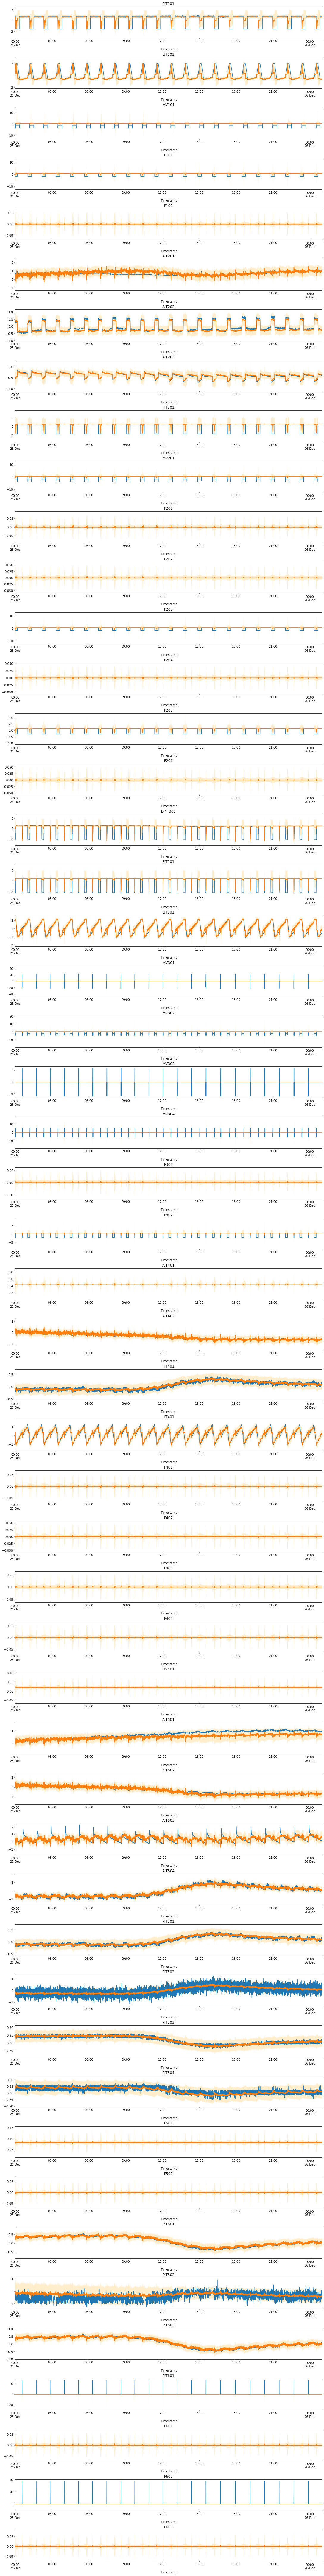

In [99]:
#define number of rows and columns for subplots
nrow=51
ncol=1
 
columns_list = data_2015_normal.columns

fig, axes = plt.subplots(nrow, ncol, figsize=(15,120), constrained_layout=True)

time_start = '2015-12-25 00'
time_end = '2015-12-26 00'

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data_2015_normal[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        mu_x_2015_normal[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data_2015_normal[columns_list[count]][time_start:time_end].index,
                         th_up_2015_normal[columns_list[count]][time_start:time_end],
                         th_down_2015_normal[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1

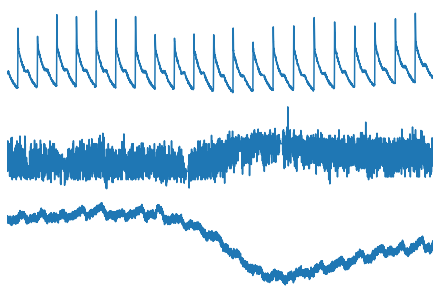

In [19]:
#define number of rows and columns for subplots
nrow=3
ncol=1
 
columns_list = ['AIT503', 'PIT502', 'PIT503']

fig, axes = plt.subplots(nrow, ncol, constrained_layout=True)

time_start = '2015-12-25 00'
time_end = '2015-12-26 00'

# plot counter
count=0
fig.patch.set_visible(False)
for r in range(nrow):
    for c in range(ncol):
        data_2015_normal[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        count+=1
        
        axes[r].axis('off')

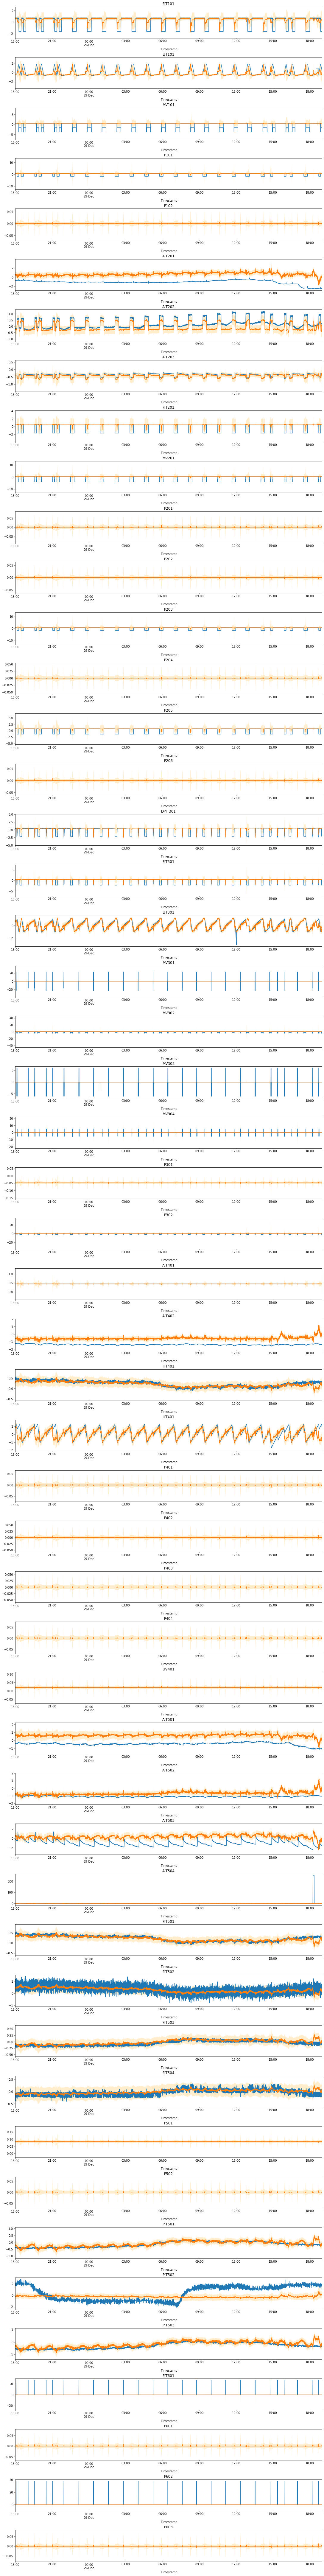

In [100]:
#define number of rows and columns for subplots
nrow=51
ncol=1
 
columns_list = data_2015_attack.columns

fig, axes = plt.subplots(nrow, ncol, figsize=(15,120), constrained_layout=True)

time_start = '2015-12-28 18'
time_end = '2015-12-29 18'

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data_2015_attack[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        mu_x_2015_attack[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data_2015_attack[columns_list[count]][time_start:time_end].index,
                         th_up_2015_attack[columns_list[count]][time_start:time_end],
                         th_down_2015_attack[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1

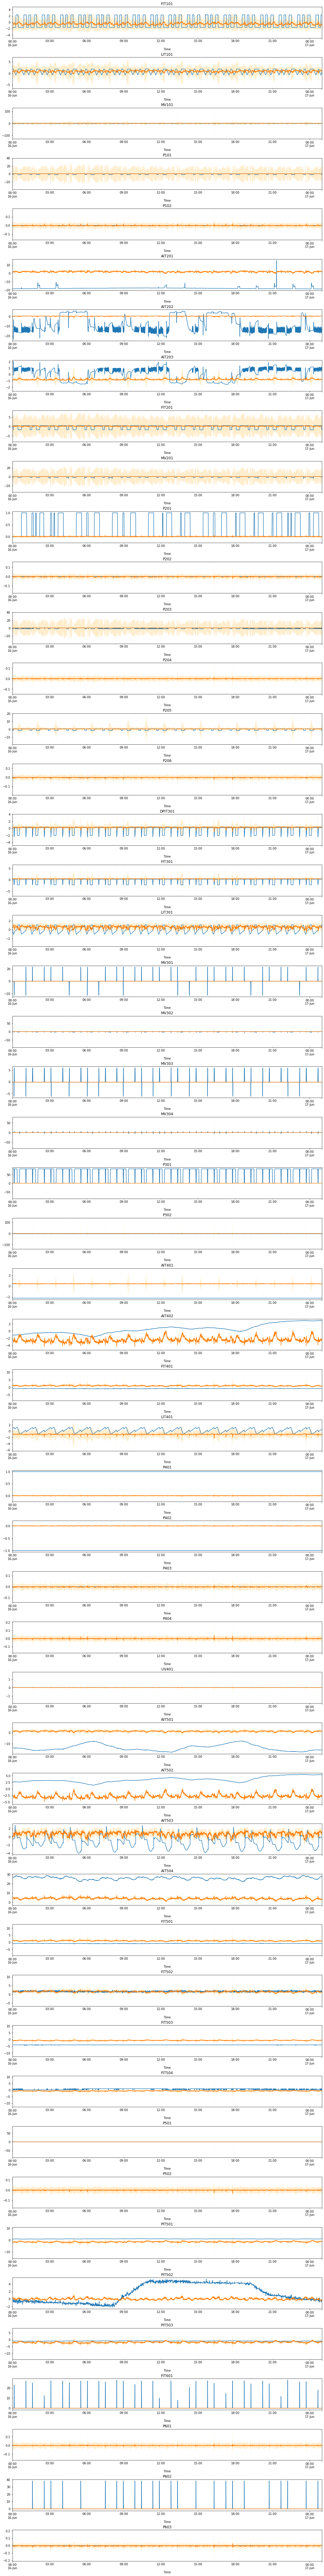

In [101]:
#define number of rows and columns for subplots
nrow=51
ncol=1
 
columns_list = data_2017_normal.columns

fig, axes = plt.subplots(nrow, ncol, figsize=(15,120), constrained_layout=True)

time_start = '2017-06-16 00'
time_end = '2017-06-17 00'

# plot counter
count=0

for r in range(nrow):
    for c in range(ncol):
        data_2017_normal[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        mu_x_2017_normal[columns_list[count]][time_start:time_end].plot(ax=axes[r])
        axes[r].fill_between(data_2017_normal[columns_list[count]][time_start:time_end].index,
                         th_up_2017_normal[columns_list[count]][time_start:time_end],
                         th_down_2017_normal[columns_list[count]][time_start:time_end],
                         facecolor='orange', alpha=0.2, interpolate=True)
        axes[r].set_title(columns_list[count])
        count+=1

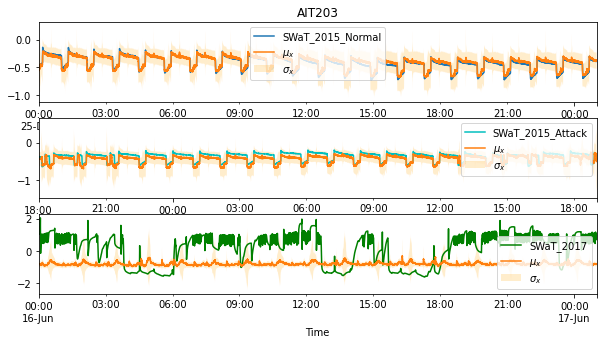

In [128]:
#define number of rows and columns for subplots
nrow=3
ncol=1
 
column_name = 'AIT203'

fig, axes = plt.subplots(nrow, ncol, figsize=[10,5])

time_start = '2015-12-25 00'
time_end = '2015-12-26 00'

# plot counter
count=0

time_start = '2015-12-25 00'
time_end = '2015-12-26 00'

data_2015_normal[column_name][time_start:time_end].plot(ax=axes[0])
mu_x_2015_normal[column_name][time_start:time_end].plot(ax=axes[0])
axes[0].fill_between(data_2015_normal[column_name][time_start:time_end].index,
                 th_up_2015_normal[column_name][time_start:time_end],
                 th_down_2015_normal[column_name][time_start:time_end],
                 facecolor='orange', alpha=0.2, interpolate=True)
axes[0].legend(['SWaT_2015_Normal', r'$\mu_x$', r'$\sigma_x$'])
axes[0].title.set_text(column_name)


time_start_attack = '2015-12-28 18'
time_end_attack = '2015-12-29 18'
data_2015_attack[column_name][time_start_attack:time_end_attack].plot(ax=axes[1], color='c')
mu_x_2015_attack[column_name][time_start_attack:time_end_attack].plot(ax=axes[1], color='tab:orange')
axes[1].fill_between(data_2015_attack[column_name][time_start_attack:time_end_attack].index,
                 th_up_2015_attack[column_name][time_start_attack:time_end_attack],
                 th_down_2015_attack[column_name][time_start_attack:time_end_attack],
                 facecolor='orange', alpha=0.2, interpolate=True)
axes[1].legend(['SWaT_2015_Attack', r'$\mu_x$', r'$\sigma_x$'])


time_start = '2017-06-16 00'
time_end = '2017-06-17 00'
data_2017_normal[column_name][time_start:time_end].plot(ax=axes[2], color='g')
mu_x_2017_normal[column_name][time_start:time_end].plot(ax=axes[2], color='tab:orange')
axes[2].fill_between(data_2017_normal[column_name][time_start:time_end].index,
                 th_up_2017_normal[column_name][time_start:time_end],
                 th_down_2017_normal[column_name][time_start:time_end],
                 facecolor='orange', alpha=0.2, interpolate=True)
axes[2].legend(['SWaT_2017', r'$\mu_x$', r'$\sigma_x$'])
plt.savefig(column_name+'_series.pdf')